# Introduction

* This project is to predict "BeatsPerMinute" with the help of music data provided.

* It Includes :
    * Framing the problem
    * Gathering the data
    * Data Exploration
    * Exploratory data analysis
    * Data Preprocessing
    * Model Training and evaluation
    * Submissiom

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
# This is not related to the project. It is to filter future warnings by seaborn

import warnings
warnings.filterwarnings('ignore')

# 1. Framing the Problem

### problem type : 
* It is a "Regression Problem".

### Features Understanding : 
* **AudioLoudness:** Measures how loud the song is. A lower (more negative) number means it's quieter.

* **TrackDurationMs:** The length of the song in milliseconds.

* **Energy:** The intensity and activity of the music. A high energy score means the song is fast and loud.

* **BeatsPerMinute:** The tempo of the song. This is the value you need to predict.

* **VocalContent:** How much singing is in the song. A score of 0 means it's a purely instrumental track.

* **InstrumentalScore:** How much of the song is made up of instruments. A high score means instruments are the main focus.

* **AcousticQuality:** The score for how "natural" the music sounds. A higher score suggests it uses real, acoustic instruments.

* **LivePerformanceLikelihood:** A score that estimates if the song was recorded live, likely based on sounds like audience noise.

* **id:** A unique number for each song. It is for identification and has no analytical value.

* **RhythmScore:** A score for how strong and clear the beat is in the song.

* **MoodScore:** A score that tries to describe the emotional feeling or "mood" of the song.



# 2. Gathering the Data

## Importing Training data 

In [3]:
# Importing traning data

train = pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')

train.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


## Importing testing data

In [4]:
# Importing testing data

test = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')

test.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


## Importing sample_submission data

In [5]:
# Importing Sample Submission data

sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')

sample_submission.head()

,id,BeatsPerMinute
0,524164,119.035
1,524165,119.035
2,524166,119.035
3,524167,119.035
4,524168,119.035


# 3. Basic Exploration

In [6]:
# Information
print("Information : \n")
print(train.info())

# Missing Values
print("\nMissing Values : \n")
print(train.isnull().sum())

# Duplicate Entries
print("\nDuplicate Entries : \n")
print(train.duplicated().sum())

Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
None

Missing Values : 

id                           0
RhythmScore             

# 4. Exploartory Data Analysis (EDA)

## Correlation heatmap

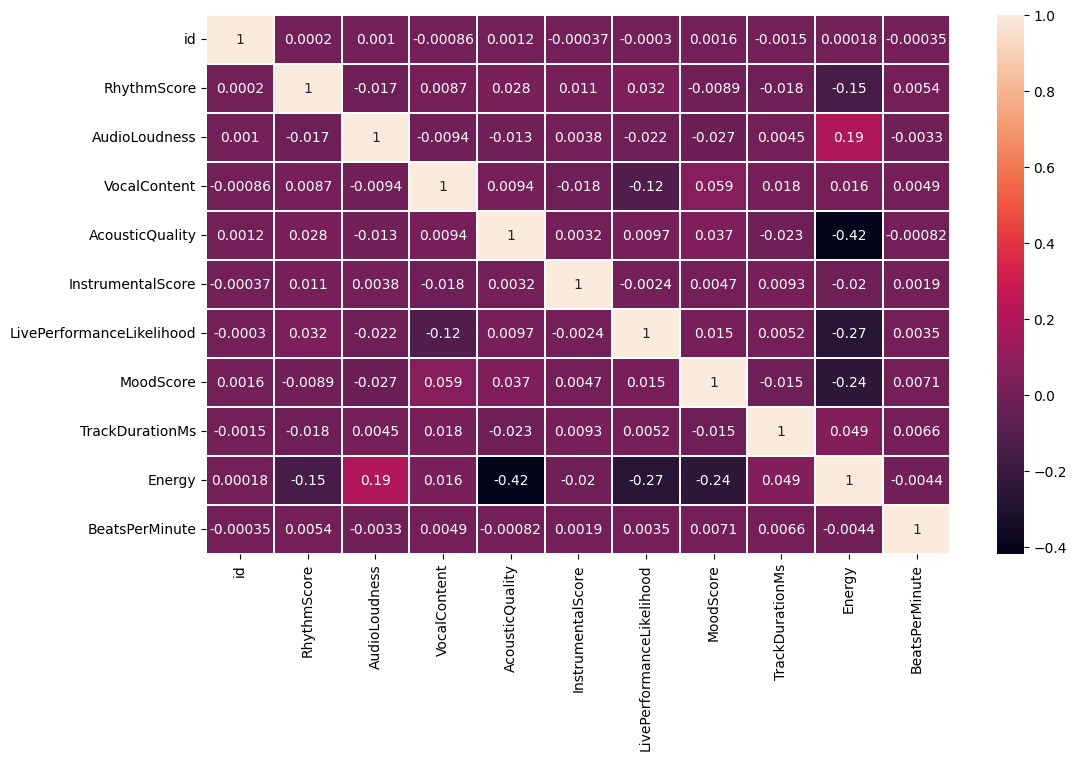

In [7]:
# Correlations between features

plt.figure(figsize=(12,7))
corr = train.corr(numeric_only = True)
sns.heatmap(corr, annot = True, linewidth = 0.2)
plt.show()

## Distributions 

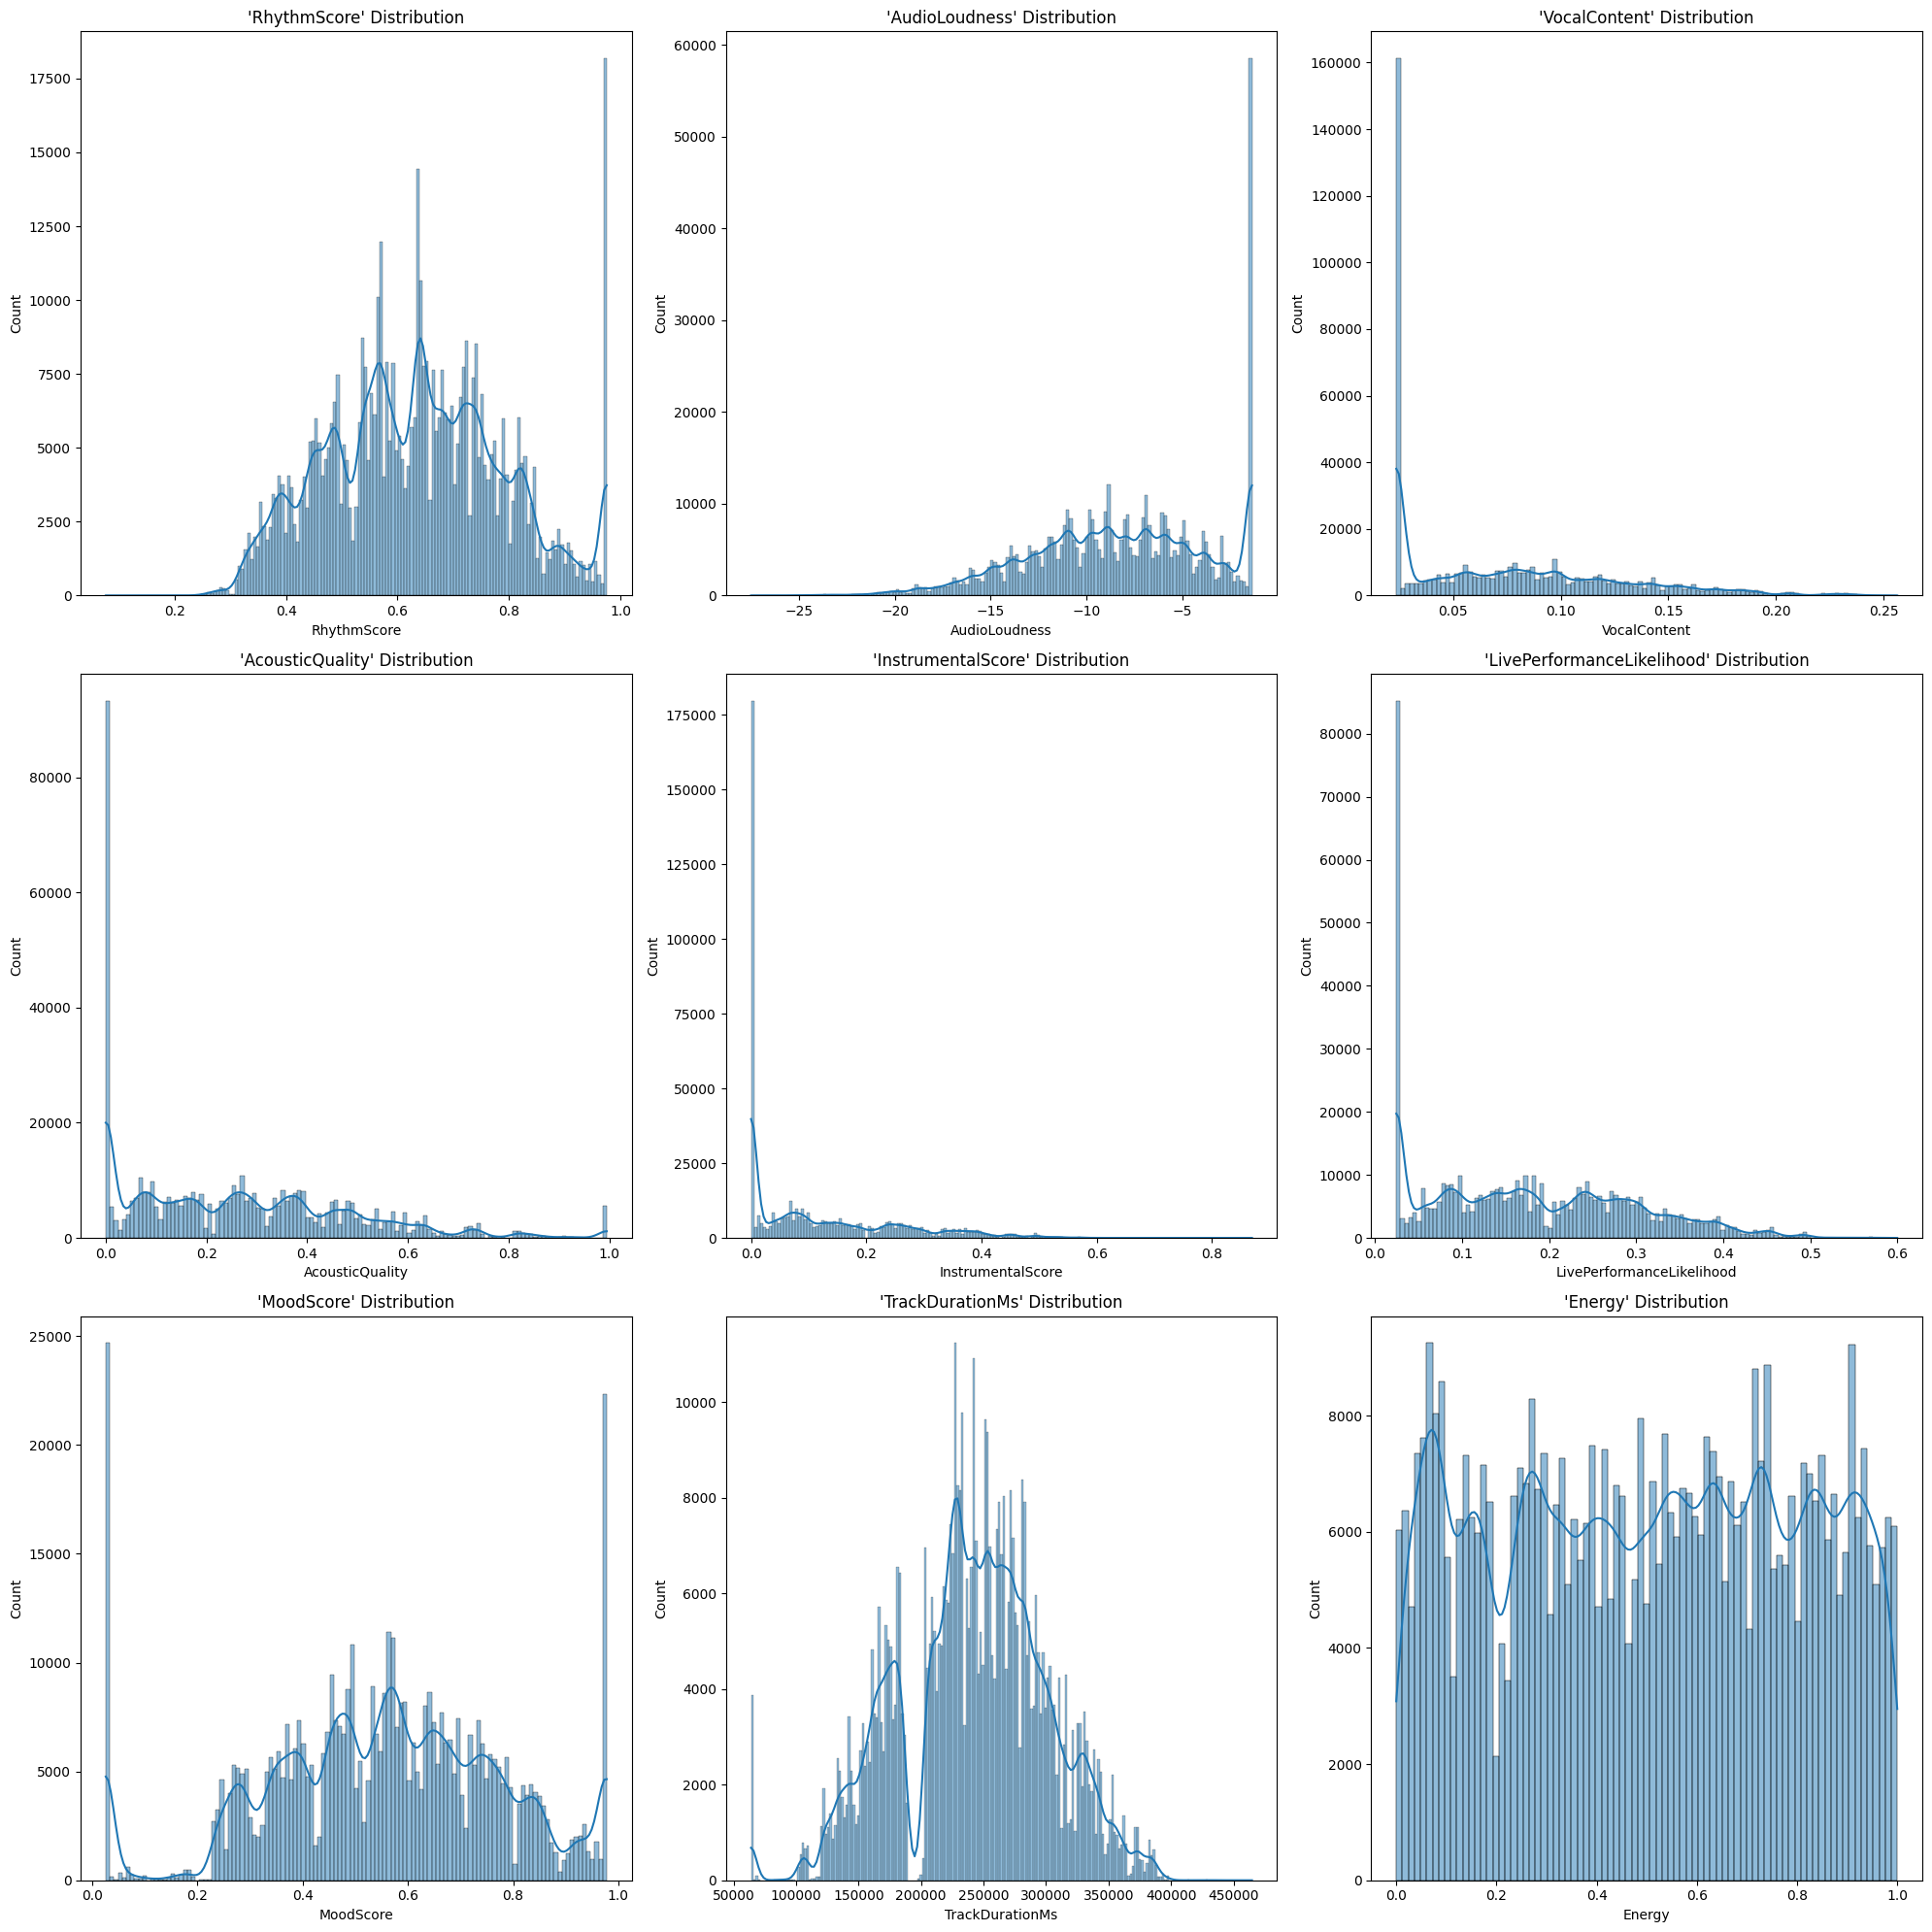

In [8]:

# Distributions of features

plt.figure(figsize = (20,20))

features = ['RhythmScore','AudioLoudness','VocalContent','AcousticQuality','InstrumentalScore','LivePerformanceLikelihood','MoodScore','TrackDurationMs','Energy']
n = 0
for col in features:
    n = n+1
    plt.subplot(3,3,n)
    sns.histplot(data = train, x = col, kde = True)
    plt.title(f"'{col}' Distribution")
plt.tight_layout()
plt.show()


## Analysis
* The data is well distributed in the max features.
* In four of the features data is right-skewed.
* By applying, np.log1p() and np.sqrt() also the skew didn't changed much.
* So, with those four features we have to extract other features for better performance.
* Also, Due to Distribution imbalance we have to use ensemble models, tree models and boosting models

# 5. Data Preprocessing

## Data Cleaning

In [9]:
train = train.drop('id', axis = 1)

test_ids = test['id']
test = test.drop('id', axis = 1)

## Feature Extraction

In [10]:
train['has_vocal'] = (train['VocalContent']>0).astype('int')
test['has_vocal'] = (test['VocalContent']>0).astype('int')

train['is_acoustic'] = (train['AcousticQuality']>0).astype('int')
test['is_acoustic'] = (test['AcousticQuality']>0).astype('int')

train['is_instrumental'] = (train['InstrumentalScore']>0).astype('int')
test['is_instrumental'] = (test['InstrumentalScore']>0).astype('int')

train['is_live'] = (train['LivePerformanceLikelihood']).astype('int')
test['is_live'] = (test['LivePerformanceLikelihood']).astype('int')

train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute,has_vocal,is_acoustic,is_instrumental,is_live
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020,1,1,1,0
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963,1,1,1,0
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989,1,1,1,0
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212,1,1,1,0
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511,1,1,1,0


## Splitting the data

In [11]:
# splitting 'train' dataset to training and testing
x = train.drop('BeatsPerMinute', axis = 1)
y = train['BeatsPerMinute']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size = 0.2,
    random_state = 30
)


## Feature Scaling

In [12]:
minmax = MinMaxScaler()

features_to_scale = ['RhythmScore','AudioLoudness','VocalContent','AcousticQuality','InstrumentalScore','LivePerformanceLikelihood','MoodScore','TrackDurationMs','Energy']

x_train_scaled = minmax.fit_transform(x_train[features_to_scale])
x_test_scaled = minmax.transform(x_test[features_to_scale])

test_scaled = minmax.transform(test[features_to_scale])

x_train[features_to_scale] = x_train_scaled
x_test[features_to_scale] = x_test_scaled

test[features_to_scale] = test_scaled


# 6. Model 1 - catboost

In [13]:
# Importing Model

from lightgbm import LGBMRegressor

## Model 1 - Training

In [14]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.02,
    depth=8,
    l2_leaf_reg=3,
    random_seed=42,
    eval_metric='MAE',
    verbose=100 
)

cat.fit(
    x_train, y_train,
    eval_set=(x_test, y_test),
    early_stopping_rounds=200
)

print("Best iteration:", cat.get_best_iteration())


0:	learn: 21.1998862	test: 21.1965535	best: 21.1965535 (0)	total: 118ms	remaining: 9m 48s
100:	learn: 21.1729132	test: 21.1923538	best: 21.1923538 (100)	total: 4.77s	remaining: 3m 51s
200:	learn: 21.1534764	test: 21.1926009	best: 21.1922138 (110)	total: 9.34s	remaining: 3m 42s
300:	learn: 21.1353668	test: 21.1931562	best: 21.1922138 (110)	total: 13.9s	remaining: 3m 36s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 21.19221379
bestIteration = 110

Shrink model to first 111 iterations.
Best iteration: 110


## Submission

In [15]:
# submitting Predictions

cat_predictions = cat.predict(test)

submission_data = pd.DataFrame({
    "id" : test_ids,
    "BeatsPerMinute" : cat_predictions
})


submission_data.to_csv('submission.csv',header = True,index = False)

